### 1. Load The Credit Card Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Dataset/BankChurners.csv')

In [3]:
df.shape

(10127, 23)

In [4]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


###  2. Number of Missing Values by Column

In [5]:
# There was no missing value in any column
df.isna().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

### 3. Categorical Features

In [6]:
df.select_dtypes('object')

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue
...,...,...,...,...,...,...
10122,Existing Customer,M,Graduate,Single,$40K - $60K,Blue
10123,Attrited Customer,M,Unknown,Divorced,$40K - $60K,Blue
10124,Attrited Customer,F,High School,Married,Less than $40K,Blue
10125,Attrited Customer,M,Graduate,Unknown,$40K - $60K,Blue


#### 3.1 Attrition_Flag - Target Feature

In [45]:
# Examine Attrition_Flag feature, no missing value on target feature
df.Attrition_Flag.value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

#### 3.2 Gender

In [8]:
# Examine Gender feature
df.Gender.value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

#### 3.3 Education_Level

In [9]:
# Examine Education_Level feature
df.Education_Level.value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [10]:
# Examine Unkown value; looks like values were missing randomly
df[df.Education_Level == 'Unknown'].sample(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
8181,719123958,Attrited Customer,40,M,4,Unknown,Divorced,$60K - $80K,Blue,27,...,5051.0,0,5051.0,0.588,2137,45,0.552,0.000,0.995490,0.00451
7061,771408483,Existing Customer,48,M,5,Unknown,Unknown,$60K - $80K,Blue,36,...,4100.0,1956,2144.0,0.617,3584,61,0.743,0.477,0.000063,0.99994
2341,715392558,Existing Customer,52,M,1,Unknown,Single,$120K +,Blue,44,...,34516.0,0,34516.0,1.030,2848,56,0.750,0.000,0.000057,0.99994
2171,716460933,Existing Customer,51,M,2,Unknown,Married,$120K +,Blue,42,...,10306.0,1427,8879.0,0.709,1456,44,0.294,0.138,0.000174,0.99983
7332,712771233,Existing Customer,52,M,3,Unknown,Single,$80K - $120K,Blue,36,...,2516.0,1268,1248.0,0.751,4461,80,0.818,0.504,0.000150,0.99985
5345,821157183,Existing Customer,42,F,5,Unknown,Married,Less than $40K,Blue,37,...,2541.0,1398,1143.0,0.635,4698,88,0.833,0.550,0.000217,0.99978
3661,711080358,Existing Customer,55,M,1,Unknown,Unknown,$120K +,Blue,46,...,19849.0,2205,17644.0,0.796,3657,66,0.737,0.111,0.000057,0.99994
9703,715989108,Existing Customer,52,M,3,Unknown,Single,$80K - $120K,Blue,42,...,27514.0,1834,25680.0,0.769,12841,100,0.786,0.067,0.000345,0.99965
3277,718500633,Existing Customer,45,F,4,Unknown,Married,Less than $40K,Blue,36,...,7924.0,1896,6028.0,1.161,3270,58,0.933,0.239,0.000038,0.99996
3940,812979408,Attrited Customer,39,F,0,Unknown,Married,$40K - $60K,Silver,34,...,15142.0,0,15142.0,0.761,2458,41,0.577,0.000,0.966900,0.03310


In [11]:
# Missing value on target feature
df.loc[df.Education_Level == 'Unknown', 'Attrition_Flag'].value_counts()

Existing Customer    1263
Attrited Customer     256
Name: Attrition_Flag, dtype: int64

C:\Users\vumac\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


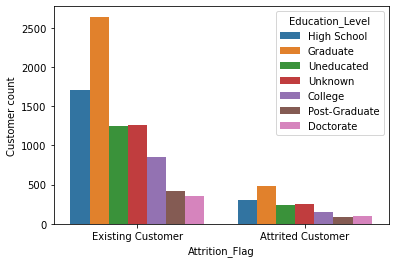

In [12]:
# Seems like there was no clear relationship between Educational_Level and Attrition_Flag
sns.countplot('Attrition_Flag',hue='Education_Level',data=df)
plt.ylabel('Customer count')
plt.show()

#### 3.4 Marital_Status

In [13]:
#Examine Marital_Status feature
df.Marital_Status.value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [14]:
# Examine Unkown value; looks like values were missing randomly
df[df.Marital_Status == 'Unknown'].sample(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
4581,711721458,Attrited Customer,50,F,2,Graduate,Unknown,Less than $40K,Blue,36,...,1438.3,0,1438.3,0.658,2329,43,0.593,0.000,0.991290,0.00871
7071,713047608,Attrited Customer,40,F,2,College,Unknown,Less than $40K,Blue,36,...,2387.0,2013,374.0,0.449,2134,41,0.952,0.843,0.989020,0.01098
7940,780222408,Existing Customer,49,F,5,Graduate,Unknown,Less than $40K,Blue,36,...,3272.0,2085,1187.0,0.417,4444,83,0.627,0.637,0.000186,0.99981
7074,713058858,Attrited Customer,54,F,2,Graduate,Unknown,Less than $40K,Blue,46,...,1695.0,913,782.0,0.449,2130,48,0.500,0.539,0.994470,0.00553
5059,713064783,Existing Customer,60,F,1,Unknown,Unknown,$40K - $60K,Blue,48,...,5362.0,2057,3305.0,0.763,4205,83,0.766,0.384,0.000532,0.99947
3486,711184983,Existing Customer,41,M,5,Unknown,Unknown,$80K - $120K,Blue,29,...,11191.0,0,11191.0,0.808,3839,73,0.780,0.000,0.000078,0.99992
6297,710853033,Existing Customer,36,F,1,Doctorate,Unknown,Less than $40K,Blue,36,...,4943.0,1204,3739.0,0.417,4024,82,0.783,0.244,0.000155,0.99985
5637,780584658,Attrited Customer,33,F,2,Uneducated,Unknown,$40K - $60K,Blue,22,...,1843.0,1293,550.0,0.349,2077,61,0.694,0.702,0.991530,0.00847
1714,713464983,Existing Customer,45,F,2,Graduate,Unknown,$40K - $60K,Blue,36,...,4947.0,1053,3894.0,1.195,3479,76,0.810,0.213,0.000516,0.99948
4639,827968383,Existing Customer,43,F,3,High School,Unknown,Less than $40K,Blue,39,...,3370.0,2284,1086.0,0.673,4084,70,0.628,0.678,0.000181,0.99982


In [15]:
# Missing value on target feature
df.loc[df.Marital_Status == 'Unknown', 'Attrition_Flag'].value_counts()

Existing Customer    620
Attrited Customer    129
Name: Attrition_Flag, dtype: int64

C:\Users\vumac\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


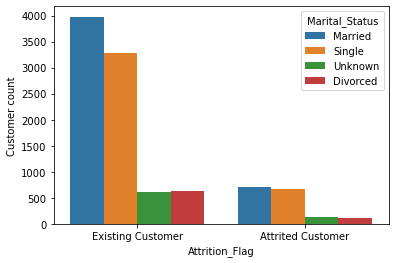

In [16]:
# Seems like there was no clear relationship between Marital_Status and Attrition_Flag
sns.countplot('Attrition_Flag',hue='Marital_Status',data=df)
plt.ylabel('Customer count')
plt.show()

#### 3.5 Income_Category

In [17]:
#Examine Income_Category feature
df.Income_Category.value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [18]:
# Examine Unkown value; looks like values were missing randomly
df[df.Income_Category == 'Unknown'].sample(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
500,778239933,Existing Customer,45,F,4,Graduate,Married,Unknown,Blue,35,...,2801.0,2043,758.0,0.583,1241,46,0.643,0.729,0.000070,0.99993
7439,714981483,Existing Customer,50,F,3,High School,Married,Unknown,Blue,38,...,2808.0,1720,1088.0,0.836,5137,81,0.723,0.613,0.000069,0.99993
1762,714457083,Existing Customer,52,F,2,High School,Married,Unknown,Blue,44,...,3456.0,2219,1237.0,0.636,1332,24,0.500,0.642,0.000175,0.99983
7498,778405458,Existing Customer,52,F,2,High School,Single,Unknown,Blue,32,...,1461.0,0,1461.0,0.676,4633,80,0.778,0.000,0.000090,0.99991
7927,788199858,Existing Customer,42,F,3,High School,Unknown,Unknown,Blue,34,...,2798.0,1049,1749.0,0.890,5758,87,0.706,0.375,0.000109,0.99989
1202,710406633,Attrited Customer,51,F,3,Uneducated,Married,Unknown,Blue,36,...,3664.0,0,3664.0,0.839,1168,31,0.409,0.000,0.994820,0.00518
9185,715551783,Existing Customer,54,F,2,Uneducated,Married,Unknown,Blue,42,...,24927.0,1273,23654.0,0.743,14603,113,0.687,0.051,0.000095,0.99990
7158,713850783,Existing Customer,56,F,1,College,Married,Unknown,Blue,36,...,4263.0,0,4263.0,0.640,4876,70,1.188,0.000,0.000104,0.99990
4283,710820783,Existing Customer,45,F,4,Graduate,Married,Unknown,Blue,36,...,5989.0,0,5989.0,0.668,4246,78,0.857,0.000,0.000058,0.99994
9538,766649283,Existing Customer,49,F,3,Graduate,Divorced,Unknown,Blue,42,...,14072.0,1917,12155.0,0.653,13432,107,0.981,0.136,0.000199,0.99980


In [19]:
# Missing value on target feature
df.loc[df.Income_Category == 'Unknown', 'Attrition_Flag'].value_counts()

Existing Customer    925
Attrited Customer    187
Name: Attrition_Flag, dtype: int64

C:\Users\vumac\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


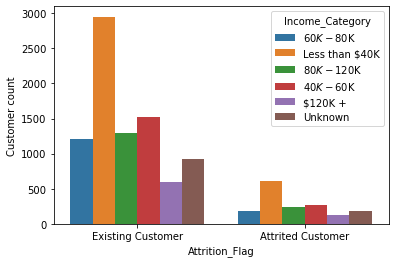

In [20]:
# Seems like there was no clear relationship between Income_Category and Attrition_Flag
sns.countplot('Attrition_Flag',hue='Income_Category',data=df)
plt.ylabel('Customer count')
plt.show()

#### 3.6 Card_Category

In [21]:
#Examine Card_Category feature
df.Card_Category.value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [22]:
# Number of churning customers per card category
df.loc[df.Attrition_Flag == 'Attrited Customer', 'Card_Category'].value_counts() 

Blue        1519
Silver        82
Gold          21
Platinum       5
Name: Card_Category, dtype: int64

In [23]:
# Percentage of churning customers by card category. 
# Platinum seems to have a higher churning rate, but there was only 20 cards. The sample was too small to know.
df.loc[df.Attrition_Flag == 'Attrited Customer', 'Card_Category'].value_counts() / df.Card_Category.value_counts()

Blue        0.160979
Silver      0.147748
Gold        0.181034
Platinum    0.250000
Name: Card_Category, dtype: float64

### 4. Numeric Features

In [24]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.00,739177606.33,36903783.45,708082083.00,713036770.50,717926358.00,773143533.00,828343083.00
Customer_Age,10127.00,46.33,8.02,26.00,41.00,46.00,52.00,73.00
Dependent_count,10127.00,2.35,1.30,0.00,1.00,2.00,3.00,5.00
Months_on_book,10127.00,35.93,7.99,13.00,31.00,36.00,40.00,56.00
Total_Relationship_Count,10127.00,3.81,1.55,1.00,3.00,4.00,5.00,6.00
Months_Inactive_12_mon,10127.00,2.34,1.01,0.00,2.00,2.00,3.00,6.00
Contacts_Count_12_mon,10127.00,2.46,1.11,0.00,2.00,2.00,3.00,6.00
Credit_Limit,10127.00,8631.95,9088.78,1438.30,2555.00,4549.00,11067.50,34516.00
Total_Revolving_Bal,10127.00,1162.81,814.99,0.00,359.00,1276.00,1784.00,2517.00
Avg_Open_To_Buy,10127.00,7469.14,9090.69,3.00,1324.50,3474.00,9859.00,34516.00


In [67]:
# Remove CLIENTNUM and last 2 columns (to ignore the Naive_Bayes columns as per the author of the dataset)
df1 = df.iloc[:, 1:-2]
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.00,46.33,8.02,26.00,41.00,46.00,52.00,73.00
Dependent_count,10127.00,2.35,1.30,0.00,1.00,2.00,3.00,5.00
Months_on_book,10127.00,35.93,7.99,13.00,31.00,36.00,40.00,56.00
Total_Relationship_Count,10127.00,3.81,1.55,1.00,3.00,4.00,5.00,6.00
Months_Inactive_12_mon,10127.00,2.34,1.01,0.00,2.00,2.00,3.00,6.00
Contacts_Count_12_mon,10127.00,2.46,1.11,0.00,2.00,2.00,3.00,6.00
Credit_Limit,10127.00,8631.95,9088.78,1438.30,2555.00,4549.00,11067.50,34516.00
Total_Revolving_Bal,10127.00,1162.81,814.99,0.00,359.00,1276.00,1784.00,2517.00
Avg_Open_To_Buy,10127.00,7469.14,9090.69,3.00,1324.50,3474.00,9859.00,34516.00
Total_Amt_Chng_Q4_Q1,10127.00,0.76,0.22,0.00,0.63,0.74,0.86,3.40


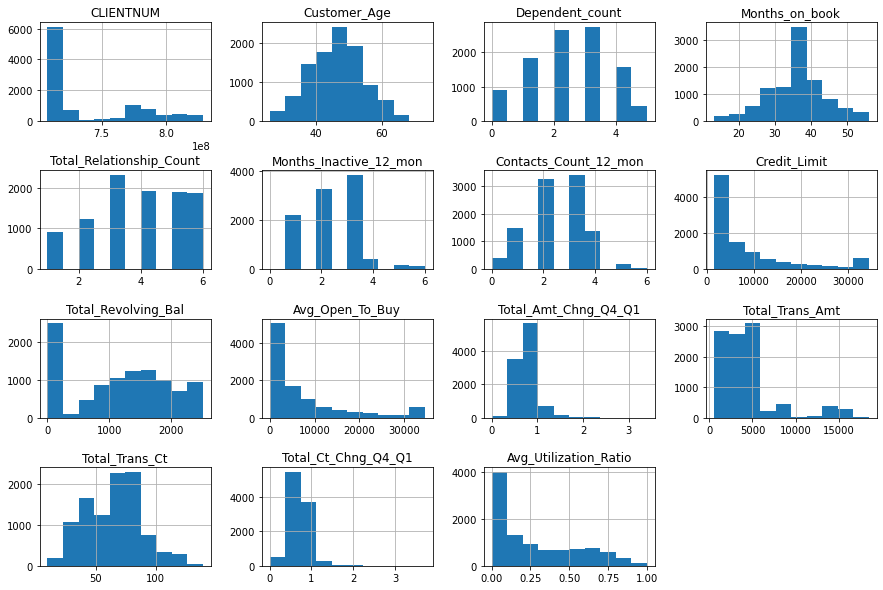

In [26]:
df1.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

#### 4.1 Months_on_book

In [27]:
# Number of accounts with 36 months on book was about 7 times higher than the second most frequent value.
# Was there really an enormous credit cards opened 36 months ago?
# Or there was an error in data input?
# Should have confirmed with the database manager or credit cards department
df1.Months_on_book.value_counts().head()

36    2463
37     358
34     353
38     347
39     341
Name: Months_on_book, dtype: int64

In [28]:
# Mean was also 36 months
df1.Months_on_book.mean()

35.928409203120374

<AxesSubplot:>

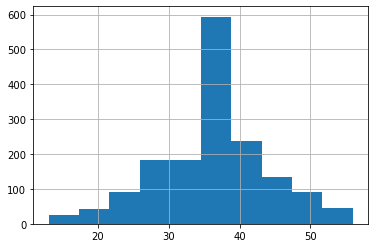

In [29]:
# Months_on_book of Attrited Customer - distribution looks identical to Months_on_book for total customers
df1.loc[df1.Attrition_Flag=='Attrited Customer', 'Months_on_book'].hist()

#### 4.2 Month_inactive_12_mon

In [30]:
# Looks like inactive account for 6 months will be closed
df1.Months_Inactive_12_mon.value_counts()

3    3846
2    3282
1    2233
4     435
5     178
6     124
0      29
Name: Months_Inactive_12_mon, dtype: int64

In [31]:
# Users with 3-4 months of inactive have a high chance of leaving the services
df1.groupby(['Attrition_Flag','Months_Inactive_12_mon'])['Card_Category'].count()

Attrition_Flag     Months_Inactive_12_mon
Attrited Customer  0                           15
                   1                          100
                   2                          505
                   3                          826
                   4                          130
                   5                           32
                   6                           19
Existing Customer  0                           14
                   1                         2133
                   2                         2777
                   3                         3020
                   4                          305
                   5                          146
                   6                          105
Name: Card_Category, dtype: int64

In [32]:
# Users with 3-4 months of inactive have a high chance of leaving the services
df1[df1.Attrition_Flag=='Attrited Customer']['Months_Inactive_12_mon'].value_counts() / df1.Months_Inactive_12_mon.value_counts()

0   0.52
1   0.04
2   0.15
3   0.21
4   0.30
5   0.18
6   0.15
Name: Months_Inactive_12_mon, dtype: float64

#### 4.3 Credit_Limit

In [33]:
# Looks like $34,516 and $1,438.30 were the upper and lower limit of credit cards 
df1.Credit_Limit.value_counts().head()

34516.00    508
1438.30     507
15987.00     18
9959.00      18
23981.00     12
Name: Credit_Limit, dtype: int64

In [34]:
# $34,516 was the maximum credit limit given to credit cards
df1.loc[df1.Credit_Limit>34516]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


In [35]:
# Around 200 Blue cards have the maximum limit
df1.loc[df1.Credit_Limit==34516, 'Card_Category'].value_counts()

Silver      221
Blue        198
Gold         74
Platinum     15
Name: Card_Category, dtype: int64

In [36]:
# $1,438.30 was the minimum credit limit credit cards
df1.loc[df1.Credit_Limit<1438.30]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


In [37]:
# $1,438.30 was the minimum credit limit for Blue credit cards
df1.loc[df1.Credit_Limit==1438.30, 'Card_Category'].value_counts()

Blue    507
Name: Card_Category, dtype: int64

#### 4.4 Total_Revolving_Bal

In [42]:
# The maximum revolving balance was $2,517
df1.Total_Revolving_Bal.max()

2517

In [60]:
# around 24% card users paid off their credit card regularly. 5% card holders only paid the minimum requirement.
df1.Total_Revolving_Bal.value_counts().head()

0       2470
2517     508
1965      12
1480      12
1720      11
Name: Total_Revolving_Bal, dtype: int64

### 5. Save Data

In [69]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [68]:
df1.shape

(10127, 20)

In [72]:
df1.to_csv('Dataset/BankChurners_cleaned.csv')